In [1]:
import pandas as pd
import numpy as np
import sqlite3
from pprint import pprint
import folium
from folium import plugins
from folium.plugins import HeatMap
%matplotlib inline
import matplotlib
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import sklearn.ensemble as ske
from IPython.core.display import HTML
import seaborn as sns
import pygeohash as pgh
import palettable
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plot_options = dict(figsize=(12,6))
import warnings
warnings.filterwarnings('ignore')

In [2]:
conn = sqlite3.connect("FPA_FOD_20170508.sqlite")

In [3]:
df = pd.read_sql_query("SELECT * FROM fires", conn)

In [4]:
df.shape

(1880465, 39)

In [5]:
df.sample(10)

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
1372563,1372564,15043379,CTS-120-2006-002,NONFED,ST-CTCTS,ST/C&L,USCTCTS,Connecticut Division of Forestry,CTCTS,Connecticut Division of Forestry,...,A,41.556484,-73.308729,14.0,MISSING/NOT SPECIFIED,CT,Litchfield,005,Litchfield,b'\x00\x01\xad\x10\x00\x00\xf4\xb5.5\xc2SR\xc0...
1825189,1825190,300244494,SFO-2015ME_MES41205009,NONFED,ST-NASF,ST/C&L,USMEMES,Maine Forest Service,ME_MES,Maine Forest Service,...,A,44.855620,-68.848805,14.0,MISSING/NOT SPECIFIED,ME,Penobscot,019,Penobscot,b'\x00\x01\xad\x10\x00\x00\x98\xeb4\xd2R6Q\xc0...
675742,675743,738700,SFO-WI051102154,NONFED,ST-NASF,ST/C&L,USWIWIS,Wisconsin Department of Natural Resources,WI Dodgeville,Dodgeville District,...,A,43.152208,-90.031391,14.0,MISSING/NOT SPECIFIED,WI,None,None,None,b'\x00\x01\xad\x10\x00\x00\x18\xdcZO\x02\x82V\...
1131813,1131814,1379857,CDF_1997_55_2223_1165,NONFED,ST-CACDF,ST/C&L,USCAMVU,Monte Vista Unit,CAMVU,CDF - Monte Vista Unit,...,B,33.073056,-117.211111,14.0,MISSING/NOT SPECIFIED,CA,None,None,None,"b'\x00\x01\xad\x10\x00\x00lQ,\xd8\x82M]\xc0P\x..."
938227,938228,1065721,SWRA_TN_4724,NONFED,ST-TNTNS,ST/C&L,USTNTNS,Tennessee Division of Forestry,TNTNS5,TNS Unit 5,...,C,35.261700,-88.160000,14.0,MISSING/NOT SPECIFIED,TN,None,None,None,b'\x00\x01\xad\x10\x00\x00\x08\xd7\xa3p=\nV\xc...
384505,384506,407350,SFO-AR0246-1258,NONFED,ST-NASF,ST/C&L,USARARS,Arkansas Forestry Commission,ARARS9,ARS District 9,...,B,34.891690,-92.400020,14.0,MISSING/NOT SPECIFIED,AR,Pulaski,119,Pulaski,b'\x00\x01\xad\x10\x00\x00\xbco|\xed\x99\x19W\...
1369865,1369866,15040225,AR-2010-2780,NONFED,ST-ARARS,ST/C&L,USARARS,Arkansas Forestry Commission,ARARS,Arkansas Forestry Commission,...,B,33.059800,-92.703600,8.0,PRIVATE,AR,UNION,139,Union,b'\x00\x01\xad\x10\x00\x00\xc8]K\xc8\x07-W\xc0...
1624097,1624098,201659577,SFO-NY-2012-NY5409-2012-0000051,NONFED,ST-NASF,ST/C&L,USNYNYX,Fire Department of New York,NY5409,Fire Department of New York,...,A,42.391400,-76.166300,14.0,MISSING/NOT SPECIFIED,NY,TIOGA,107,Tioga,b'\x00\x01\xad\x10\x00\x00\xc8T\xc1\xa8\xa4\nS...
1629783,1629784,201702338,TFS-TXFD2012-419366,NONFED,ST-TXTXS,ST/C&L,USTXTXS,Texas A & M Forest Service,TXVFD,Schulenburg Volunteer Fire Department,...,B,29.687951,-96.902619,14.0,MISSING/NOT SPECIFIED,TX,Fayette,149,Fayette,b'\x00\x01\xad\x10\x00\x00\xe0o{\x82\xc49X\xc0...
20899,20900,21003,FS-1451479,FED,FS-FIRESTAT,FS,USCACNF,Cleveland National Forest,0502,Cleveland National Forest,...,A,33.390556,-117.272222,5.0,USFS,CA,59,059,Orange,b'\x00\x01\xad\x10\x00\x00<\t\xbf\x16lQ]\xc0P\...


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880465 entries, 0 to 1880464
Data columns (total 39 columns):
OBJECTID                      int64
FOD_ID                        int64
FPA_ID                        object
SOURCE_SYSTEM_TYPE            object
SOURCE_SYSTEM                 object
NWCG_REPORTING_AGENCY         object
NWCG_REPORTING_UNIT_ID        object
NWCG_REPORTING_UNIT_NAME      object
SOURCE_REPORTING_UNIT         object
SOURCE_REPORTING_UNIT_NAME    object
LOCAL_FIRE_REPORT_ID          object
LOCAL_INCIDENT_ID             object
FIRE_CODE                     object
FIRE_NAME                     object
ICS_209_INCIDENT_NUMBER       object
ICS_209_NAME                  object
MTBS_ID                       object
MTBS_FIRE_NAME                object
COMPLEX_NAME                  object
FIRE_YEAR                     int64
DISCOVERY_DATE                float64
DISCOVERY_DOY                 int64
DISCOVERY_TIME                object
STAT_CAUSE_CODE               float64
S

In [7]:
df.isnull().sum()

OBJECTID                            0
FOD_ID                              0
FPA_ID                              0
SOURCE_SYSTEM_TYPE                  0
SOURCE_SYSTEM                       0
NWCG_REPORTING_AGENCY               0
NWCG_REPORTING_UNIT_ID              0
NWCG_REPORTING_UNIT_NAME            0
SOURCE_REPORTING_UNIT               0
SOURCE_REPORTING_UNIT_NAME          0
LOCAL_FIRE_REPORT_ID          1459286
LOCAL_INCIDENT_ID              820821
FIRE_CODE                     1555636
FIRE_NAME                      957189
ICS_209_INCIDENT_NUMBER       1854748
ICS_209_NAME                  1854748
MTBS_ID                       1869462
MTBS_FIRE_NAME                1869462
COMPLEX_NAME                  1875282
FIRE_YEAR                           0
DISCOVERY_DATE                      0
DISCOVERY_DOY                       0
DISCOVERY_TIME                 882638
STAT_CAUSE_CODE                     0
STAT_CAUSE_DESCR                    0
CONT_DATE                      891531
CONT_DOY    

In [8]:
fires = df.loc[:,['STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'DISCOVERY_DATE', 'DISCOVERY_DOY', 'DISCOVERY_TIME', 
                  'LATITUDE', 'LONGITUDE', 'STATE', 'OWNER_CODE', 'OWNER_DESCR','FIRE_SIZE', 'FIRE_SIZE_CLASS', 'FIRE_YEAR']].copy()
fires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880465 entries, 0 to 1880464
Data columns (total 13 columns):
STAT_CAUSE_CODE     float64
STAT_CAUSE_DESCR    object
DISCOVERY_DATE      float64
DISCOVERY_DOY       int64
DISCOVERY_TIME      object
LATITUDE            float64
LONGITUDE           float64
STATE               object
OWNER_CODE          float64
OWNER_DESCR         object
FIRE_SIZE           float64
FIRE_SIZE_CLASS     object
FIRE_YEAR           int64
dtypes: float64(6), int64(2), object(5)
memory usage: 186.5+ MB


In [9]:
fires.sample(5)

,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,LATITUDE,LONGITUDE,STATE,OWNER_CODE,OWNER_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,FIRE_YEAR
358652,9.0,Miscellaneous,2454506.5,41,1300,37.444080,-79.614060,VA,3.0,NPS,2.5,B,2008
1124880,8.0,Children,2450655.5,207,None,40.368056,-122.206944,CA,14.0,MISSING/NOT SPECIFIED,0.1,A,1997
267593,9.0,Miscellaneous,2453592.5,222,0546,43.240000,-100.855500,SD,2.0,BIA,0.5,B,2005
1762384,5.0,Debris Burning,2456991.5,334,1830,36.909302,-83.817902,KY,8.0,PRIVATE,3.0,B,2014
1635032,13.0,Missing/Undefined,2456200.5,274,1315,48.359167,-95.282222,MN,7.0,STATE,25396.0,G,2012


In [10]:
stat_cause_mapping = df \
    .groupby(['STAT_CAUSE_DESCR', 'STAT_CAUSE_CODE']) \
    .size()\
    .to_frame()\
    .reset_index()\
    .drop(0, axis=1)\
    .set_index('STAT_CAUSE_CODE')\
    .sort_index()['STAT_CAUSE_DESCR']
stat_cause_mapping

STAT_CAUSE_CODE
1.0             Lightning
2.0         Equipment Use
3.0               Smoking
4.0              Campfire
5.0        Debris Burning
6.0              Railroad
7.0                 Arson
8.0              Children
9.0         Miscellaneous
10.0            Fireworks
11.0            Powerline
12.0            Structure
13.0    Missing/Undefined
Name: STAT_CAUSE_DESCR, dtype: object

In [11]:
owner_code_mapping = df \
    .groupby(['OWNER_DESCR', 'OWNER_CODE']) \
    .size()\
    .to_frame()\
    .reset_index()\
    .drop(0, axis=1)\
    .set_index('OWNER_CODE')\
    .sort_index()['OWNER_DESCR']
owner_code_mapping

OWNER_CODE
0.0                   FOREIGN
1.0                       BLM
2.0                       BIA
3.0                       NPS
4.0                       FWS
5.0                      USFS
6.0             OTHER FEDERAL
7.0                     STATE
8.0                   PRIVATE
9.0                    TRIBAL
10.0                      BOR
11.0                   COUNTY
12.0          MUNICIPAL/LOCAL
13.0         STATE OR PRIVATE
14.0    MISSING/NOT SPECIFIED
15.0        UNDEFINED FEDERAL
Name: OWNER_DESCR, dtype: object

In [16]:
__train_df, __test_df = sklearn.model_selection.train_test_split(df)

fires_df = {
    "train": __train_df.copy(),
    "test": __test_df.copy()
}

display(HTML('''
<p>
    Number of Training Rows: {}<br />
    Number of Test Rows: {}
'''.format(fires_df["train"].shape[0], fires_df["test"].shape[0])))

In [17]:
qual_colormap = palettable.matplotlib.Inferno_20
quant_colormap = palettable.matplotlib.Inferno_20_r

# Number of Wildfires per Cause

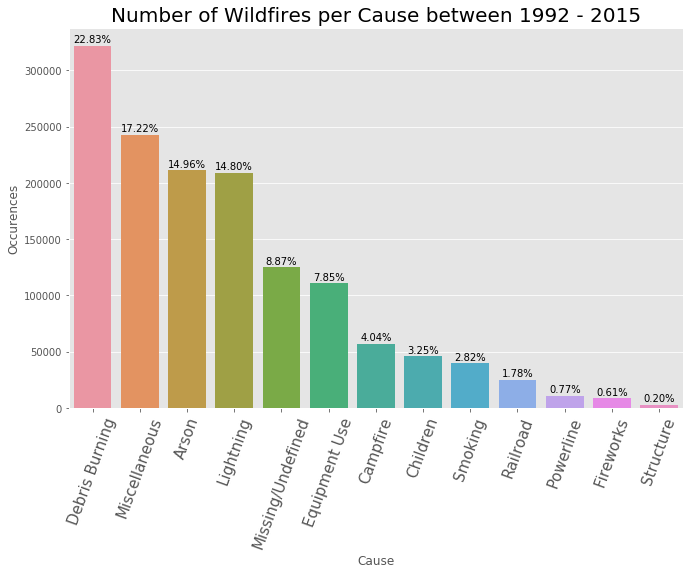

In [18]:
counts_by_cause = fires_df["train"].groupby('STAT_CAUSE_DESCR')\
    .size()\
    .sort_values(ascending=False)
counts_by_cause_pcts = counts_by_cause.apply(lambda x: 100 * x / float(counts_by_cause.sum()))

plt.figure(figsize=(11,7))
ax = sns.barplot(counts_by_cause.index, counts_by_cause.values)
ax.set_xticklabels(labels=counts_by_cause.index, rotation=90)

for i, p in enumerate(ax.patches):
    height = p.get_height()
    width = p.get_width()
    ax.text(
        p.get_x()+(width/2.),
        height + 3000,
        '{:1.2f}%'.format(counts_by_cause_pcts[i]),
        ha="center") 

plt.title('Number of Wildfires per Cause between 1992 - 2015', fontsize=20)
plt.xlabel('Cause')
plt.ylabel('Occurences')
plt.xticks(rotation=70,fontsize=15)
plt.show()

# Number of Wildfires per Day of Year over Cause

In [19]:
cause_by_doy = fires_df["train"].groupby(['DISCOVERY_DOY', 'STAT_CAUSE_DESCR'])\
    .size()\
    .unstack()
causes = list(cause_by_doy.columns.values)
cause_by_doy['Total'] = cause_by_doy.sum(axis=1)

cause_by_doy_proportional = pd.DataFrame()
for cause in causes:
    cause_by_doy_proportional[cause] = cause_by_doy[[cause, 'Total']].apply(lambda x: x[cause]/x['Total'], axis=1)
cause_by_doy = cause_by_doy.drop('Total', axis=1)
display(cause_by_doy.head(10))


STAT_CAUSE_DESCR,Arson,Campfire,Children,Debris Burning,Equipment Use,Fireworks,Lightning,Miscellaneous,Missing/Undefined,Powerline,Railroad,Smoking,Structure
DISCOVERY_DOY,,,,,,,,,,,,,
1,406.0,91.0,162.0,719.0,144.0,38.0,17.0,952.0,341.0,9.0,55.0,82.0,4.0
2,351.0,41.0,99.0,619.0,125.0,5.0,14.0,474.0,169.0,8.0,34.0,57.0,2.0
3,358.0,52.0,60.0,593.0,162.0,3.0,15.0,406.0,166.0,7.0,55.0,48.0,3.0
4,336.0,49.0,56.0,561.0,115.0,8.0,6.0,348.0,185.0,18.0,52.0,64.0,3.0
5,369.0,46.0,68.0,626.0,173.0,2.0,10.0,397.0,193.0,9.0,51.0,77.0,5.0
6,308.0,40.0,57.0,660.0,146.0,2.0,11.0,375.0,170.0,13.0,64.0,53.0,1.0
7,366.0,47.0,60.0,698.0,159.0,4.0,5.0,416.0,207.0,22.0,68.0,79.0,1.0
8,387.0,54.0,64.0,734.0,155.0,4.0,5.0,434.0,265.0,7.0,43.0,64.0,5.0
9,287.0,54.0,41.0,556.0,143.0,1.0,21.0,329.0,234.0,8.0,72.0,55.0,2.0


In [20]:
cause_by_doy = fires_df["train"].groupby(['FIRE_YEAR', 'STAT_CAUSE_DESCR'])\
    .size()\
    .unstack()
causes = list(cause_by_doy.columns.values)
cause_by_doy['Total'] = cause_by_doy.sum(axis=1)

cause_by_doy_proportional = pd.DataFrame()
for cause in causes:
    cause_by_doy_proportional[cause] = cause_by_doy[[cause, 'Total']].apply(lambda x: x[cause]/x['Total'], axis=1)
cause_by_doy = cause_by_doy.drop('Total', axis=1)
display(cause_by_doy.head(10))

STAT_CAUSE_DESCR,Arson,Campfire,Children,Debris Burning,Equipment Use,Fireworks,Lightning,Miscellaneous,Missing/Undefined,Powerline,Railroad,Smoking,Structure
FIRE_YEAR,,,,,,,,,,,,,
1992,8337,1945,2203,9476,4239,170,9259,5549,6187,101,1492,1956,29
1993,8247,2075,1889,9221,4167,191,5603,5128,6627,98,1375,1804,46
1994,7558,2811,2404,11150,4101,301,12072,5296,7601,107,1501,1950,51
1995,9534,2940,2471,12502,4221,163,6022,5528,6213,125,1602,2181,68
1996,7743,3024,2263,12687,4522,232,9396,5355,7392,125,2177,1859,67
1997,8204,1893,2169,11132,4313,212,6423,7313,1336,127,1633,1465,88
1998,10595,1987,2350,11439,4572,220,8188,6972,1578,266,1422,1822,83
1999,14384,2481,2639,16737,5645,244,8856,9324,1868,278,1913,2446,94
2000,13371,2017,2658,16282,4898,226,12391,14140,1109,261,2302,2340,110


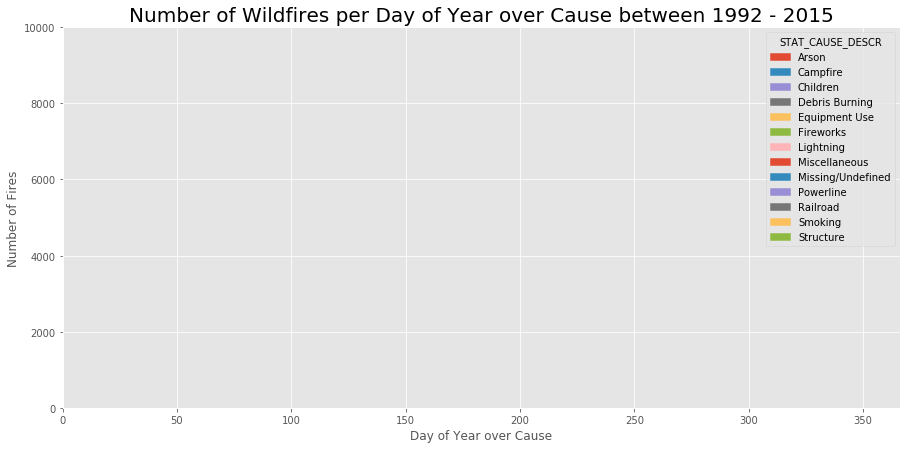

In [34]:
ax = cause_by_doy.plot.area(figsize=(15,7))
ax.set_xlim(0,366)
ax.set_ylim(0,10000)

plt.title('Number of Wildfires per Day of Year over Cause between 1992 - 2015', fontsize=20)
plt.xlabel('Day of Year over Cause')
plt.ylabel('Number of Fires')

plt.show()

# Number of Wildfires per Owner

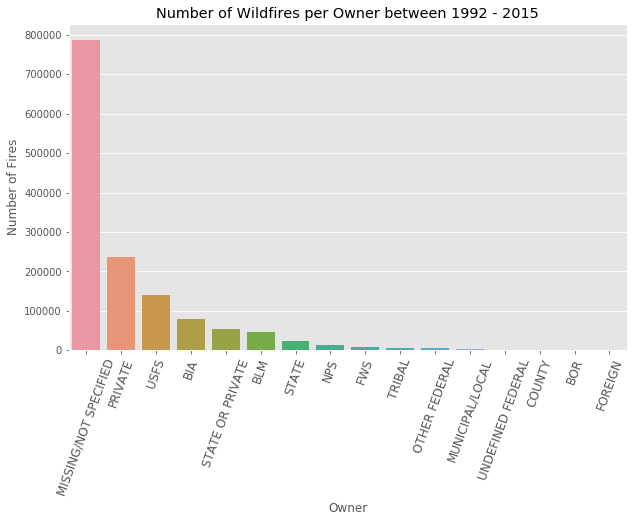

In [22]:
plt.figure(figsize=(10, 6))
counts_by_owner = fires_df["train"].groupby('OWNER_DESCR')\
    .size()\
    .sort_values(ascending=False)

ax = sns.barplot(counts_by_owner.index, counts_by_owner.values)
labels = ax.set_xticklabels(labels=counts_by_owner.index, rotation=70,fontsize=12)

plt.title('Number of Wildfires per Owner between 1992 - 2015')
plt.xlabel('Owner')
plt.ylabel('Number of Fires')
plt.show()

# Average Wildfire Size by Cause

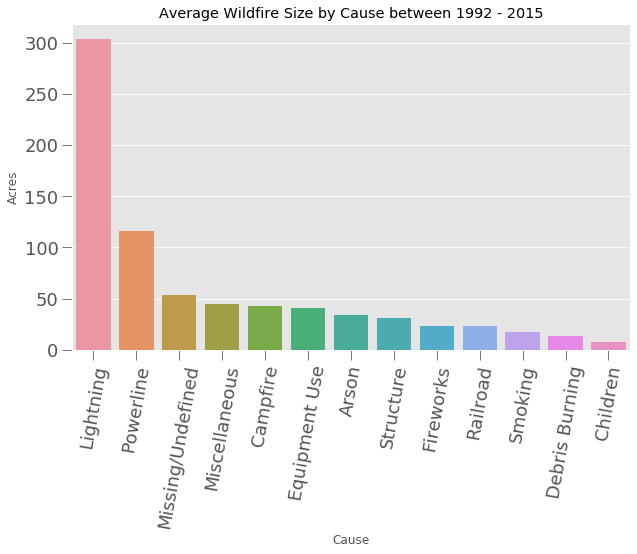

In [23]:
avg_fire_size = fires_df["train"].groupby('STAT_CAUSE_DESCR')\
.mean().reset_index()\
.drop(['FIRE_YEAR','DISCOVERY_DOY','LATITUDE','LONGITUDE'],axis=1)\
.sort_values(by='FIRE_SIZE',ascending=False)

plt.figure(figsize = (10,6))

ax=sns.barplot('STAT_CAUSE_DESCR','FIRE_SIZE',data=avg_fire_size)

plt.xticks(rotation=80,fontsize=18)
plt.tick_params(axis='both',size=10, labelsize=18)

plt.title('Average Wildfire Size by Cause between 1992 - 2015')
plt.xlabel('Cause')
plt.ylabel('Acres');

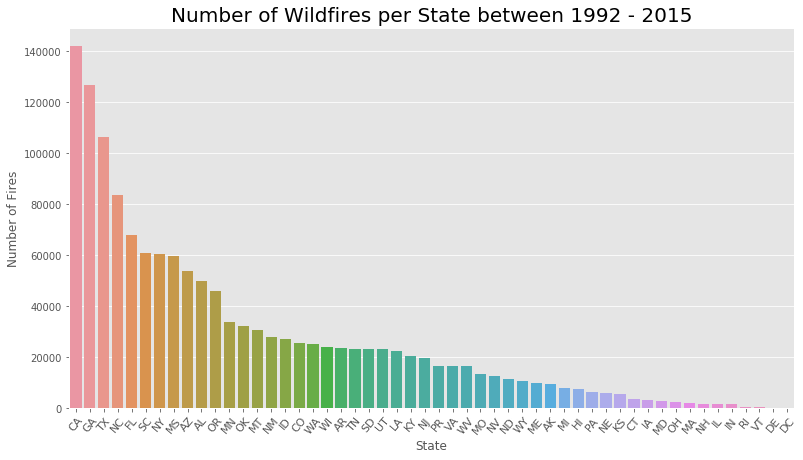

In [24]:
counts_by_state = fires_df["train"].groupby('STATE')\
    .size()\
    .sort_values(ascending=False)

plt.figure(figsize=(13, 7))


ax = sns.barplot(counts_by_state.index, counts_by_state.values)
labels = ax.set_xticklabels(labels=counts_by_state.index, rotation=50,fontsize=11)

plt.title('Number of Wildfires per State between 1992 - 2015', fontsize=20)
plt.xlabel('State')
plt.ylabel('Number of Fires')

plt.show()

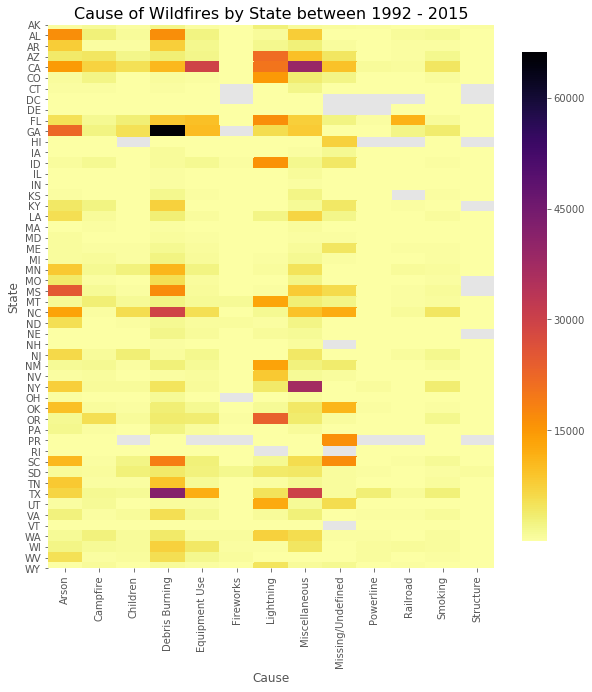

In [25]:
cause_by_state = fires_df["train"].groupby(['STATE', 'STAT_CAUSE_DESCR'])\
    .size()\
    .unstack()
causes = list(cause_by_state.columns.values)
cause_by_state['Total'] = cause_by_state.sum(axis=1)
cause_by_state_proportional = pd.DataFrame()
for cause in causes:
    cause_by_state_proportional[cause] = cause_by_state[[cause, 'Total']].apply(lambda x: x[cause]/x['Total'], axis=1)
cause_by_state = cause_by_state.drop('Total', axis=1)

plt.figure(figsize=(10, 10))
ax = sns.heatmap(
    cause_by_state,
    cbar_kws={'shrink':.9 }, 
    #annot=False,
    cmap='inferno_r'
)
plt.title('Cause of Wildfires by State between 1992 - 2015', fontsize=16)
plt.xlabel('Cause')
plt.ylabel('State')

plt.show()

In [26]:
def prepare_data(conn, columns, limit=None, geohash_precision=None, apply_log=None):
    """
    Prepare the data to be ready to train. Impute values to get rid of missing values and 
    preprocess categorical values.
    
    Arguments:
        conn: SQLite connection (sqlite3) to the database.
        columns: Columns in SQL-syntax, which should be queried. Note, that you can also 
            combine columns, e. g. `(A-B) AS C`. Furthermore, a `VARCHAR`-datatype indicates 
            a categorical feature, while numbers are seen as numerical features.
        limit: Limit the amount of the queried data.
        apply_log: List of columnnames, for which a logarithm should be applied.
    Returns:
        X: Features / explanatory matrix 
        y: Response vector
    """
    
    if not "FIRE_SIZE" in columns:
        columns.append("FIRE_SIZE")
    
    columns_sql_string = ",".join(columns)
    
    limit_sql_string = ""
    if limit is not None:
        limit_sql_string = f"LIMIT {limit}"
        
    # In the current data version FIRE_SIZE is never NULL, however, since sqllite is dynamically typed, 
    # filtering does not hurt :). Same for minimum of DURATION_DAY.
    df = pd.read_sql_query(
        f"""
        SELECT {columns_sql_string} 
        FROM Fires JOIN NWCG_UnitIDActive_20170109 AS NWCG ON Fires.NWCG_REPORTING_UNIT_ID == NWCG.UnitId 
        WHERE FIRE_SIZE IS NOT NULL AND FIRE_SIZE > 0 AND DURATION_DAY > 0
        {limit_sql_string};
        """, 
        conn
    )
    
    if apply_log is not None:
        for column_name in apply_log:            
            df[column_name] = df[column_name].apply(np.log)
    
    X = df.drop(columns=["FIRE_SIZE"])
    y = df["FIRE_SIZE"]
    
    if geohash_precision is not None:
        create_geohash = lambda row: pgh.encode(row["LATITUDE"], row["LONGITUDE"], geohash_precision)
        X["GEOHASH"] = X[["LATITUDE", "LONGITUDE"]].apply(create_geohash, axis=1)
    
    # treat missing variables in numerical columns by imputing the mean
    # note, that int-typed columns can be categorical (e. g. STAT_CAUSE_CODE, but we take STAT_CAUSE_DESCR instead)
    X_numerical = X.select_dtypes(include=["float", "int"])
    fill_nan = lambda col: col.fillna(col.mean())
    X_numerical = X_numerical.apply(fill_nan)
    
    # prepare categorical columns
    X_categorical = X.select_dtypes(include=["object"])
    X_categorical = pd.get_dummies(X_categorical, dummy_na=False, drop_first=True)
    
    
    # Merge categorical and numerical
    X = pd.concat([X_numerical, X_categorical], axis=1)
    
    return X, y

columns = [
    "(CONT_DATE-DISCOVERY_DATE) AS DURATION_DAY",
    """
    (
      CONT_DATE - DISCOVERY_DATE + (
        ((CONT_TIME % 100)/60.0 + CONT_TIME / 100)/24
      ) - (
        ((DISCOVERY_TIME % 100)/60.0 + DISCOVERY_TIME / 100)/24
      )
    ) AS DURATION_COMBINED
    """, 
    """
    (
      ((DISCOVERY_TIME % 100)/60.0 + DISCOVERY_TIME / 100)/24 - 
      ((CONT_TIME % 100)/60.0 + CONT_TIME / 100)/24
    ) AS DURATION_DAY_HOURS
    """, 
    "LATITUDE", 
    "LONGITUDE", 
    "Fires.STATE", 
    "CAST(FIRE_YEAR AS VARCHAR) AS STR_FIRE_YEAR", 
    "CAST(DISCOVERY_DOY/20 AS VARCHAR) AS STR_DISCOVERY_DOY", 
    "DISCOVERY_DATE",
    "DISCOVERY_DOY",
    "CONT_DOY",
    "(366-DISCOVERY_DOY) AS DISCOVERY_DOY_INV",
    "CAST((366-DISCOVERY_DOY)/20 AS VARCHAR) AS STR_DISCOVERY_DOY_INV",
    "CAST(STAT_CAUSE_CODE AS VARCHAR) AS STR_STAT_CAUSE_CODE", 
    "WildlandRole",
    "Department",
    "Agency",
    "GeographicArea",
    "SOURCE_SYSTEM_TYPE",
    "SOURCE_SYSTEM",
    "Parent",
    "OWNER_CODE"
]


In [27]:
def fit_model(X, y):
    """
    Fits a linear regression model to the given data.
    
    Arguments:
        X: Prepared Features / explanatory matrix (by `prepare_data()`)
        y: Prepared response vector (by `prepare_data()`)
    Returns:
        scores: Dictionary containing scores e. g. `{"test_score": 0.99, "train_score": 0.99}`
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.02, random_state=42)
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)


    # Evaluate model performance r2_score

    # Predict 
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)

    # Score
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)

    return dict(test_score=test_score, train_score=train_score)


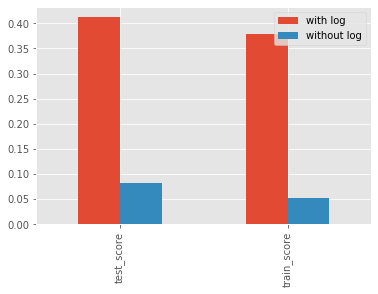

In [28]:
# without log
X, y = prepare_data(
    conn, 
    columns,
    limit=4e5,
    geohash_precision=2
)
scores_without_log = fit_model(X, y)

# with log
X_log, y_log = prepare_data(
    conn, 
    columns + [ 
        """
        (
          CONT_DATE - DISCOVERY_DATE + (
            ((CONT_TIME % 100)/60.0 + CONT_TIME / 100)/24
          ) - (
            ((DISCOVERY_TIME % 100)/60.0 + DISCOVERY_TIME / 100)/24
          )
        ) AS DURATION_COMBINED_LOG
        """
    ],
    limit=4e5,
    geohash_precision=2,
    apply_log=["FIRE_SIZE", "DURATION_COMBINED_LOG"]
)

scores_with_log = fit_model(X_log, y_log)

pd.DataFrame.from_records([scores_with_log, scores_without_log], index=["with log", "without log"]).T.plot.bar();


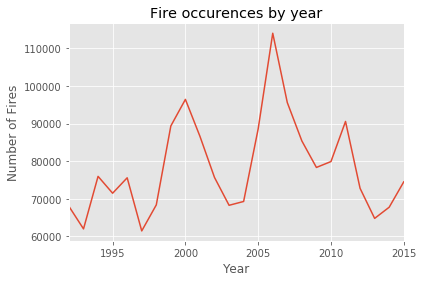

In [29]:
fires['FIRE_YEAR'].value_counts().sort_index().plot()
plt.xlabel('Year')
plt.ylabel('Number of Fires')
_=plt.title('Fire occurences by year')

In [30]:
df = pd.read_sql_query("SELECT latitude, longitude FROM fires;", conn)
lats = df['LATITUDE']
lons = df['LONGITUDE']

In [31]:
# bounding box of united states
bbox_ll = [24.0, -125.0]
bbox_ur = [50.0, -66.0] 

# geographical center of united states
lat_0 = 39.833333
lon_0 = -98.583333

# compute appropriate bins to aggregate data
# nx is number of bins in x-axis, i.e. longitude
# ny is number of bins in y-axis, i.e. latitude
nx = 100
ny = 50

# form the bins
lon_bins = np.linspace(bbox_ll[1], bbox_ur[1], nx)
lat_bins = np.linspace(bbox_ll[0], bbox_ur[0], ny)

# aggregate the number of fires in each bin, only use the density
density, _, _ = np.histogram2d(lats, lons, [lat_bins, lon_bins])

# get the mesh for the lat and lon
lon_bins_2d, lat_bins_2d = np.meshgrid(lon_bins, lat_bins)

In [32]:
density = np.hstack((density,np.zeros((density.shape[0],1))))
density = np.vstack((density,np.zeros((density.shape[1]))))

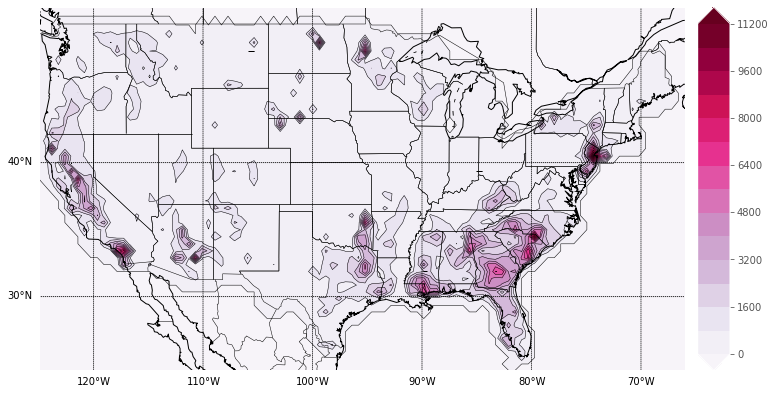

In [33]:
%matplotlib inline  
from mpl_toolkits.basemap import Basemap, cm
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([0.1,0.1,0.8,0.8])

# create polar stereographic Basemap instance
# lat_ts is the latitude of true scale
# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon are the lat/lon values of the lower left and upper right corners of the map
# use low resolution coastlines
m = Basemap(projection='merc',
            lon_0=lon_0,lat_0=90.,lat_ts=lat_0,
            llcrnrlat=bbox_ll[0],urcrnrlat=bbox_ur[0],
            llcrnrlon=bbox_ll[1],urcrnrlon=bbox_ur[1],
            rsphere=6371200.,resolution='l',area_thresh=10000)

# draw coastlines, state and country boundaries, edge of map
m.drawcoastlines()
m.drawstates()
m.drawcountries()
# draw parallels
parallels = np.arange(0.,90,10.)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
# draw meridians
meridians = np.arange(180.,360.,10.)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)

# convert the bin mesh to map coordinates
# xs, ys = m(lon_bins_2d, lat_bins_2d) # will be plotted using pcolormesh
# create contour lines
CS1 = m.contour(lon_bins_2d, lat_bins_2d, density,15,linewidths=0.5,colors='k',latlon=True)
# fill between contour lines. plt.cm.jet
CS2 = m.contourf(lon_bins_2d, lat_bins_2d, density, CS1.levels, cmap=plt.cm.PuRd, extend='both', latlon=True)
# draw colorbar
m.colorbar(CS2) 

plt.show()